# Project Title:Black Friday Sales Prediction

####Problem Statement: A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
####The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

####Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the Data
blackfridaysalestrain=pd.read_csv("/content/black_friday_train.csv")

In [ ]:
blackfridaysalestest=pd.read_csv("/content/black_friday_test.csv")

In [ ]:
print(blackfridaysalestrain.shape)
print(blackfridaysalestest.shape)

(316202, 12)
(233599, 11)


In [ ]:
blackfridaysalestrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
blackfridaysalestest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# EDA

In [ ]:
blackfridaysalestrain.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
blackfridaysalestrain.Purchase.describe()

count    316202.000000
mean       9326.818648
std        4974.477042
min         158.000000
25%        5868.000000
50%        8061.000000
75%       12065.000000
max       23961.000000
Name: Purchase, dtype: float64

#####Skewness and Kurtosis

#####Skewness:if the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
#####If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
#####If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed. 
##### Kurtosis : The height of the Distribution Curve with respect to Normal Distribution
#####It tells us if the data is heavy or light tailed relative to a normal distribution.
#####Kurtosis range from -10 to +10.

In [ ]:
print(blackfridaysalestrain.Purchase.skew())
print(blackfridaysalestrain.Purchase.kurt())

0.625391195395392
-0.33479813630259425


#####Missing Values Treatment

In [ ]:
# Find Missing Values in both train and test data
blackfridaysalestrain.isnull().sum().sort_values(ascending=False)

Product_Category_3            218994
Product_Category_2             97845
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

In [ ]:
blackfridaysalestest.isnull().sum().sort_values(ascending=False)

Product_Category_3            162562
Product_Category_2             72344
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
dtype: int64

In [ ]:
blackfridaysalestrain.Product_Category_2.value_counts(dropna=False)

NaN     97845
8.0     37150
14.0    31989
2.0     28552
16.0    25091
15.0    21881
5.0     15289
4.0     15012
6.0      9553
11.0     8171
17.0     7707
13.0     6135
9.0      3294
12.0     3225
10.0     1685
3.0      1661
18.0     1597
7.0       365
Name: Product_Category_2, dtype: int64

In [ ]:
#A product code has to be created that will tell us it is a missing value
# Impute with Numerical Missing code "99"
blackfridaysalestrain.Product_Category_2=blackfridaysalestrain.Product_Category_2.fillna(99)

In [ ]:
blackfridaysalestrain.Product_Category_2.value_counts(dropna=False)

99.0    97845
8.0     37150
14.0    31989
2.0     28552
16.0    25091
15.0    21881
5.0     15289
4.0     15012
6.0      9553
11.0     8171
17.0     7707
13.0     6135
9.0      3294
12.0     3225
10.0     1685
3.0      1661
18.0     1597
7.0       365
Name: Product_Category_2, dtype: int64

In [ ]:
blackfridaysalestest.Product_Category_2=blackfridaysalestest.Product_Category_2.fillna(99)

In [ ]:
blackfridaysalestest.Product_Category_2.value_counts(dropna=False)

99.0    72344
8.0     27229
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: Product_Category_2, dtype: int64

In [ ]:
blackfridaysalestest.Product_Category_3.value_counts(dropna=False)

NaN     162562
16.0     13833
15.0     11955
14.0      7855
5.0       7141
17.0      7116
8.0       5299
9.0       4953
12.0      3869
13.0      2390
6.0       1998
18.0      1992
4.0        816
11.0       780
10.0       775
3.0        265
Name: Product_Category_3, dtype: int64

In [ ]:
blackfridaysalestrain.Product_Category_3=blackfridaysalestrain.Product_Category_3.fillna(99)

In [ ]:
blackfridaysalestrain.Product_Category_3.value_counts(dropna=False)

99.0    218994
16.0     18991
15.0     16190
14.0     10764
17.0      9762
5.0       9692
8.0       7399
9.0       6813
12.0      5438
13.0      3120
6.0       2856
18.0      2658
4.0       1090
11.0      1076
10.0       987
3.0        372
Name: Product_Category_3, dtype: int64

In [ ]:
blackfridaysalestest.Product_Category_3=blackfridaysalestest.Product_Category_3.fillna(99)

In [ ]:
blackfridaysalestest.Product_Category_3.value_counts(dropna=False)

99.0    162562
16.0     13833
15.0     11955
14.0      7855
5.0       7141
17.0      7116
8.0       5299
9.0       4953
12.0      3869
13.0      2390
6.0       1998
18.0      1992
4.0        816
11.0       780
10.0       775
3.0        265
Name: Product_Category_3, dtype: int64

######Hypothesis Testing

In [ ]:
# What is the Average Purchase Amount for Gender M & F?
blackfridaysalestrain.Purchase.groupby(blackfridaysalestrain.Gender).mean()

Gender
F    8812.425876
M    9494.885735
Name: Purchase, dtype: float64

In [ ]:
# Test Null Average Purchase Amount of Gender M & F are equal?
# 2 Sample Independent t test - Exactly 2 levels or classses in categorical var
# Split data into male & female
male=blackfridaysalestrain[blackfridaysalestrain.Gender=='M']
female=blackfridaysalestrain[blackfridaysalestrain.Gender=='F']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(male.Purchase,female.Purchase,equal_var=False)
# Since p-value is less than 0.05, REJECT NUll
# Null - There is no Significant difference in Average Purchase of Gender M &F

Ttest_indResult(statistic=34.445413933988526, pvalue=6.392846484001652e-259)

In [ ]:
blackfridaysalestrain.Marital_Status.value_counts()

0    186404
1    129798
Name: Marital_Status, dtype: int64

In [ ]:
# Test Null Average Purchase of Marital_Status 0 & 1 equal?
# groupby(), splitdata, Conduct Test & infer
blackfridaysalestrain.Purchase.groupby(blackfridaysalestrain.Marital_Status).mean()

Marital_Status
0    9320.534313
1    9335.843634
Name: Purchase, dtype: float64

In [ ]:
maritalno=blackfridaysalestrain[blackfridaysalestrain.Marital_Status==0]
maritalyes=blackfridaysalestrain[blackfridaysalestrain.Marital_Status==1]

In [ ]:
# Null - There is no Significant difference in Average Purchase of 
# Marital_Status 0(No) & 1(Yes).
ttest_ind(maritalno.Purchase,maritalyes.Purchase,equal_var=False)
# Since pvalue=0.7309 is greater than 0.05, Fail to Reject Null

Ttest_indResult(statistic=-0.8515086320542857, pvalue=0.39448759995925675)

In [ ]:
# What is the Average Purchase of different City_Category?
blackfridaysalestrain.Purchase.groupby(blackfridaysalestrain.City_Category).mean()

City_Category
A    8950.827893
B    9186.955956
C    9845.237675
Name: Purchase, dtype: float64

In [ ]:
# Since more than 2 Levels or Classes - Anova Single Factor or One Way Anova
# Split data
cityA=blackfridaysalestrain[blackfridaysalestrain.City_Category=='A']
cityB=blackfridaysalestrain[blackfridaysalestrain.City_Category=='B']
cityC=blackfridaysalestrain[blackfridaysalestrain.City_Category=='C']

In [ ]:
from scipy.stats import f_oneway

In [ ]:
# Null - There is no Significant difference in Average Purchase of different
# City_Category(A,B,C).
f_oneway(cityA.Purchase,cityB.Purchase,cityC.Purchase)
# Since pvalue=0.0 is less than 0.05, Reject Null

F_onewayResult(statistic=831.2646231229243, pvalue=0.0)

In [ ]:
# What is the Average Purchase of different Stay_In_Current_City_Years?
blackfridaysalestrain.Purchase.groupby(
    blackfridaysalestrain.Stay_In_Current_City_Years).mean()

Stay_In_Current_City_Years
0     9227.812478
1     9317.555244
2     9396.734412
3     9344.022710
4+    9332.001229
Name: Purchase, dtype: float64

In [ ]:
stay0=blackfridaysalestrain[blackfridaysalestrain.Stay_In_Current_City_Years=='0']
stay1=blackfridaysalestrain[blackfridaysalestrain.Stay_In_Current_City_Years=='1']
stay2=blackfridaysalestrain[blackfridaysalestrain.Stay_In_Current_City_Years=='2']
stay3=blackfridaysalestrain[blackfridaysalestrain.Stay_In_Current_City_Years=='3']
stay4=blackfridaysalestrain[blackfridaysalestrain.Stay_In_Current_City_Years=='4+']

In [ ]:
# Null - There is no Significant difference in Average Purchase of different
# Stay_In_Current_City_Years.
f_oneway(stay0.Purchase,stay1.Purchase,stay2.Purchase,stay3.Purchase,
         stay4.Purchase)
# Since pvalue=1.4011435777855407e-07 is less than 0.05, Reject Null

F_onewayResult(statistic=7.415529700704701, pvalue=5.73755219634876e-06)

In [ ]:
# Test Null No Association between Gender and Marital_Status
pd.crosstab(blackfridaysalestrain.Gender,blackfridaysalestrain.Marital_Status)

Marital_Status,0,1
Gender,,
F,45080,32790
M,141324,97008


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Null - There is no Association between both variables
chi2_contingency(pd.crosstab(blackfridaysalestrain.Gender,
                             blackfridaysalestrain.Marital_Status))
# Since p-value=7.80091894540745e-18 is less than 0.05, Reject Null

(47.872735884887426,
 4.548022937738975e-12,
 1,
 array([[ 45905.08434482,  31964.91565518],
        [140498.91565518,  97833.08434482]]))

In [ ]:
# Test Null No Association between City_Category and Stay_In_Current_City_Years
pd.crosstab(blackfridaysalestrain.City_Category,
            blackfridaysalestrain.Stay_In_Current_City_Years)

Stay_In_Current_City_Years,0,1,2,3,4+
City_Category,,,,,
A,14103,28271,15487,14382,12977
B,16553,47912,24152,24605,20009
C,12299,35024,18835,15746,15847


In [ ]:
# Null _ There is no association between both variables
chi2_contingency(pd.crosstab(blackfridaysalestrain.City_Category,
            blackfridaysalestrain.Stay_In_Current_City_Years))
# Since p-value=0.0 is less than 0.05, Reject Null

(1183.6127084258248,
 3.329331361421125e-250,
 8,
 array([[11576.85625012, 29971.5388897 , 15759.40152181, 14751.15989146,
         13161.04344691],
        [18098.99243205, 46856.81879621, 24637.88810317, 23061.62618516,
         20575.6744834 ],
        [13279.15131783, 34378.64231409, 18076.71037501, 16920.21392338,
         15096.28206969]]))

#####Preprocessing And Label Encoding

In [ ]:
blackfridaysalestrain.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
# Unique Product_ID
print(len(np.unique(blackfridaysalestrain.Product_ID)))
#There are huge number of Product_ID,so we will delete both Product_ID and User_ID

3532


In [ ]:
# Split data into Independent Variables(X) and dependent Variable(y)
X=blackfridaysalestrain.drop(['User_ID','Product_ID','Purchase'],axis=1)
y=blackfridaysalestrain.Purchase

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
X=X.apply(le.fit_transform)

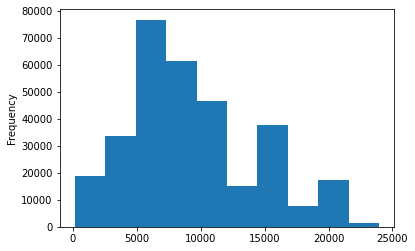

In [ ]:
# Identify the distribution of y - histogram, boxplot & density curve
y.plot(kind='hist')

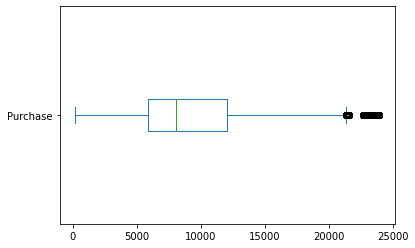

In [ ]:
y.plot(kind='box',vert=False)

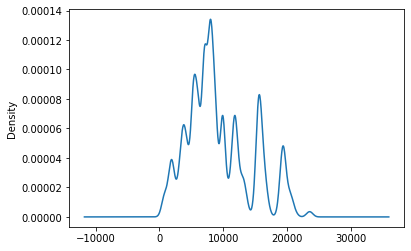

In [ ]:
y.plot(kind='density')
#It is not a normal distribution

In [ ]:
# Calculating Outliers - maximum - Q3+1.5*IQR
blackfridaysalestrain.Purchase.describe()

count    316202.000000
mean       9326.818648
std        4974.477042
min         158.000000
25%        5868.000000
50%        8061.000000
75%       12065.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
12054+(1.5*(12054.00-5823.00))

21400.5

In [ ]:
# Number of Outliers
len(blackfridaysalestrain[blackfridaysalestrain.Purchase>=21400.5])

1556

In [ ]:
2677/550068 # % of Outliers - less than 1%

0.004866671029763593

#####Model Building

In [ ]:
# Label Encode Test Data
X_test=blackfridaysalestest.drop(['User_ID','Product_ID'],axis=1)

In [ ]:
X_test=X_test.apply(le.fit_transform)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
regmodel=reg.fit(X,y)

In [ ]:
regmodel.score(X,y) # R Square indicates underfitting as the RSquare is
# below required threshold of 0.60 - 0.95.

0.12769787904657848

In [ ]:
testregpredict=regmodel.predict(X_test)

In [ ]:
regpredict=regmodel.predict(X)

In [ ]:
regresidual=y-regpredict

In [ ]:
np.sqrt(np.mean(regresidual**2)) #RMSE

4646.010728848519

In [ ]:
pd.DataFrame(testregpredict).to_csv("reg1.csv")

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF=RandomForestRegressor(n_estimators=2000,max_depth=8)

In [ ]:
RFmodel=RF.fit(X,y)

In [ ]:
RFmodel.score(X,y)

0.6477133846421859

In [ ]:
RFtestpredict=RFmodel.predict(X_test)

In [ ]:
RFpredict=RFmodel.predict(X)

In [ ]:
RFresidual=y-RFpredict

In [ ]:
np.sqrt(np.mean(RFresidual**2)) #RMSE

2952.533376151419

In [ ]:
pd.DataFrame(RFtestpredict).to_csv("RF1.csv")

In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree=DecisionTreeRegressor()

In [ ]:
treemodel=tree.fit(X,y)

In [ ]:
treemodel.score(X,y)

0.8130733061806528

In [ ]:
treetestpredict=treemodel.predict(X_test)

In [ ]:
treepredict=treemodel.predict(X)

In [ ]:
treeresidual=y-treepredict

In [ ]:
np.sqrt(np.mean(treeresidual**2)) #RMSE

2150.7127338849205

In [ ]:
pd.DataFrame(treetestpredict).to_csv('tree1.csv')

In [ ]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm=GradientBoostingRegressor(n_estimators=3000,max_depth=8)

In [ ]:
gbmmodel=gbm.fit(X,y)

In [ ]:
gbmmodel.score(X,y)

0.7629680904375625

In [ ]:
gbmtestpredict=gbmmodel.predict(X_test)

In [ ]:
gbmpredict=gbmmodel.predict(X)

In [ ]:
gbmresidual=y-gbmpredict

In [ ]:
np.sqrt(np.mean(gbmresidual**2)) #RMSE

2421.8662313675536

In [ ]:
pd.DataFrame(gbmtestpredict).to_csv('gbm1.csv')

In [ ]:
#XGB Regressor
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor(learning_rate=1,max_depth=6,min_child_weight=40,seed=0,
                 n_estimators=2000)

In [ ]:
xgbmodel=xgb.fit(X,y)

[20:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgbmodel.score(X,y)

0.7343487969977953

In [ ]:
xgbtestpredict=xgbmodel.predict(X_test)

In [ ]:
xgbpredict=xgbmodel.predict(X)

In [ ]:
xgbresidual=y-xgbpredict

In [ ]:
np.sqrt(np.mean(xgbresidual**2)) #RMSE

2563.9091816899954

In [ ]:
pd.DataFrame(xgbtestpredict).to_csv("xgb1.csv")

#####Conclusion

#####  I entered the predicted test values into the competition Black Friday Sales Prediction on analyticsvidhya.com website. Of all of the models The most accurate regression method is extreme gradient boosting(xgb) with RMSE 2955.44780429051